# Ejemplo Regresión Lineal

En el siguiente código se crea una red neuronal de una sola neurona que calcula la recta $y = 2x + 1$

# Importaciones

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Creación de los datos

Se crean dos vectores usando numpy. El primero con los valores de $x$ y el segundo con los de $y$ y ploteamos el resultado para observar cómodamente la recta.

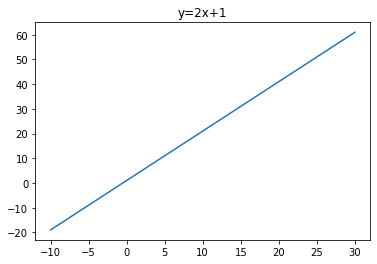

In [2]:
x = np.array([-10, 0, 10, 20, 30], dtype=float)
y = np.array([-19, 1, 21, 41, 61], dtype=float)

# Ploteamos los valores
plt.title('y=2x+1')
plt.plot(x, y);

# Creación del modelo con keras

In [3]:
# Definición de las neuronas. Creamos un modelo secuencial con una sola neurona densa cuya entrada va a ser exclusivamente
# un número
modelo = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

# Definimos los parámetros de pérdida y el optimizador
modelo.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

# Mostramos información del modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento del modelo
Entrenamos en este caso durante 500 épocas y le decimos que no noss muestre los resultados

In [4]:
# Primero iniciamos tensorboard para que nos guarde los datos de simulación en una carpeta
log_dir = "logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Y entrenamos el modelo. Se entrena con 500 épocas para ver que no son necesarias
entrenamiento = modelo.fit(x, y, epochs=500, verbose=False, callbacks=[tensorboard_callback])

# Gráfico de pérdida
Aquó podemos observar cómo la precisión del modelo va aumentando con el tiempo de forma que podemos analizar si el cambio de ciertos parámetros como el número de épocas podría resultar beneficioso o todo lo contrario.

**Si queremos abrir tensorboard para más información, poner en la terminal:**

cd "ruta del notebook"

tensorboard --logdir='logs\'

Y en chrome, ya podemos abrir tensorboard con: http://localhost:6006/

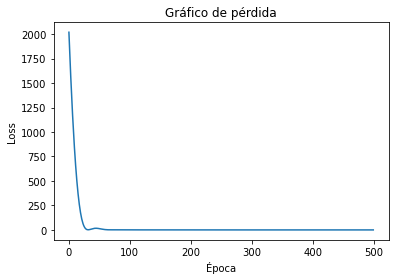

In [5]:
plt.title("Gráfico de pérdida")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.plot(entrenamiento.history['loss'])

# Observar weights y biases
Podemos comprobar que los valores que ha obtenido la red como weights y biases corresponden con la pendiente y la ordenada en el origen, ya que $y = mx + n = wx + b$

In [6]:
print("Los valores obtenidos son: {}".format(modelo.layers[0].get_weights()))

Los valores obtenidos son: [array([[1.999974]], dtype=float32), array([1.0007291], dtype=float32)]


# Predicción de valores
Ahora viene la parte interesante y para la cual hemos creado la red, la predicción de valores. Introduciremos un valor y comprobaremos que obtenemos el resultado deseado

In [7]:
print(modelo.predict([100.0]))

[[200.99814]]


Que es efectivamente el valor obtenido teóricamente